<a href="https://colab.research.google.com/github/Bruno-csr/Predict_Online_Course_Engagement/blob/main/Predict_Online_Course_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentação
> * https://scikit-learn.org/stable/modules/svm.html#classification
> * https://scikit-learn.org/stable/supervised_learning.html


*   LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
*   SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* Seaborn: https://www.analyticslane.com/2023/07/18/creacion-de-graficos-de-barras-y-graficos-de-columnas-con-seaborn/


#Imports

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Tratamento e importação de dados

About this file

1. **UserID:** Unique identifier for each use
2. **CourseCategory:** Category of the course taken by the user (e.g., Programming, Business, Arts)
3. **TimeSpentOnCourse**: Total time spent by the user on the course in hours
4. **NumberOfVideosWatched**: Total number of videos watched by the user
5. **NumberOfQuizzesTaken**: Total number of quizzes taken by the user
6. **QuizScores**: Average scores achieved by the user in quizzes (percentage)
7. **CompletionRate**: Percentage of course content completed by the user
8. **DeviceType**: Type of device used by the user (e.g., Desktop, Mobile)
9. **CourseCompletion** (Target Variable): Course completion status (0: Not Completed, 1: Completed)

In [64]:
uri = "https://raw.githubusercontent.com/Bruno-csr/Predict_Online_Course_Engagement/main/online_course_engagement_data.csv"
dados = pd.read_csv(uri)
dados.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [65]:
a_renomear = {
    'UserID' : 'Usuario',
    'CourseCategory' : 'Tipo',
    'TimeSpentOnCourse' : 'Tempo_Gasto',
    'NumberOfVideosWatched' : 'Videos_assistidos',
    'NumberOfQuizzesTaken' : 'Provas_feitas',
    'QuizScores' : 'Notas_Provas',
    'CompletionRate' : 'Taxa_conclusao',
    'DeviceType' : 'Dispositivo',
    'CourseCompletion' : 'Curso_concluido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Usuario,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


  Troca e ID para tipo de curso

  1. Health: Saude
  2. Programming: Programacao,
  3. Arts: Artes,
  4. Science: Ciencias,
  5. Business: Negocios

In [66]:
a_trocar = {
    'Health': 1,
    'Programming': 2,
    'Arts': 3,
    'Science': 4,
    'Business': 5
}
dados.Tipo = dados.Tipo.map(a_trocar)
dados.head()

,Usuario,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,5618,1,29.979719,17,3,50.365656,20.860773,1,0
1,4326,3,27.802640,1,5,62.615970,65.632415,1,0
2,5849,3,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,2,92.490647,16,0,98.428285,18.102478,0,0


In [67]:
dados = dados.drop(columns = 'Usuario', axis=1)
dados.head()

,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,1,29.979719,17,3,50.365656,20.860773,1,0
1,3,27.802640,1,5,62.615970,65.632415,1,0
2,3,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,2,92.490647,16,0,98.428285,18.102478,0,0


#Análises
Primeiros insights com a base de dados

## Ajustes e uso de uma segunda tabela

In [68]:
dtAnalises = dados.copy()
descTipo = {
    1 : 'Saúde',
    2 : 'Programação',
    3 : 'Artes',
    4 : 'Ciências',
    5 : 'Negócios'
}
dtAnalises.Tipo = dtAnalises.Tipo.map(descTipo)
dtAnalises.head()

,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,Saúde,29.979719,17,3,50.365656,20.860773,1,0
1,Artes,27.802640,1,5,62.615970,65.632415,1,0
2,Artes,86.820485,14,2,78.458962,63.812007,1,1
3,Ciências,35.038427,17,10,59.198853,95.433162,0,1
4,Programação,92.490647,16,0,98.428285,18.102478,0,0


## Tempo Gasto Médio por Tipo de Curso

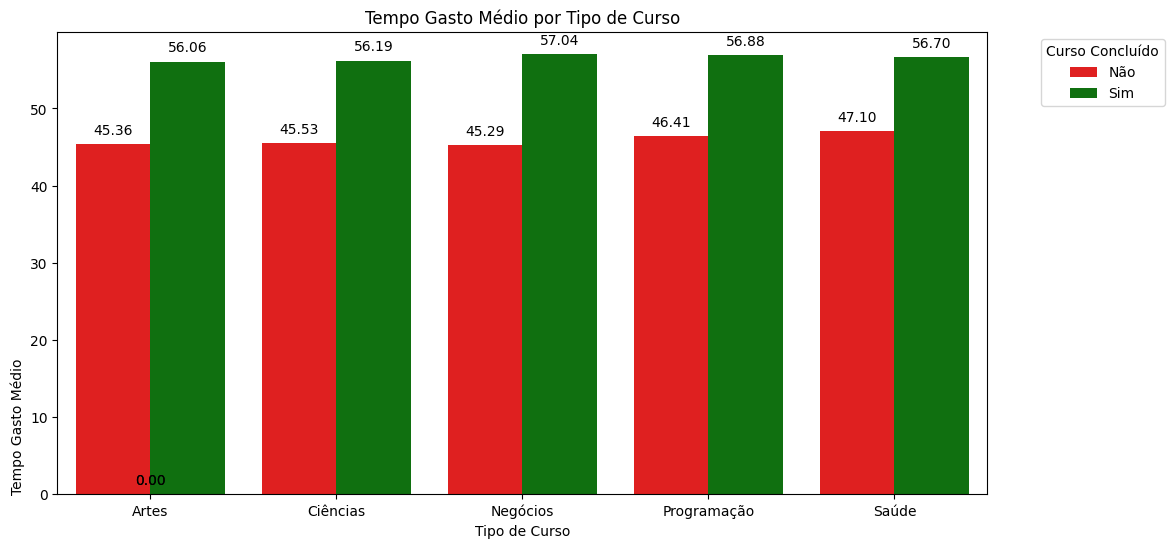

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados por 'Tipo' e calcula a média do 'Tempo_Gasto' para cada tipo
tempo_gasto_por_tipo = dtAnalises.groupby(['Tipo', 'Curso_concluido'])['Tempo_Gasto'].mean().reset_index()

"""
Explicação do código:
.mean(): Calcula a média do agrupamento de dados

.reset_index(): Transforma o objeto Series em um DataFrame. As colunas do índice hierárquico
              ('Tipo' e 'Curso_concluido') se tornam colunas regulares do DataFrame, e um novo índice
              numérico simples é criado.

--> DataFrames são mais fáceis de manipular e usar em outras operações do pandas do que
    objetos Series com índices hierárquicos.
"""

#cores personalizadas
cores = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum']

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Tipo', y='Tempo_Gasto', data=tempo_gasto_por_tipo, hue='Curso_concluido', palette={0: 'red', 1: 'green'})
plt.xlabel('Tipo de Curso')
plt.ylabel('Tempo Gasto Médio')
plt.title('Tempo Gasto Médio por Tipo de Curso')

# Ajusta a legenda com cores
handles, labels = ax.get_legend_handles_labels()
labels = ['Não', 'Sim']
ax.legend(handles, labels, title='Curso Concluído', loc='upper left', bbox_to_anchor=(1.05, 1))  # Define a posição da legenda

# Adiciona rótulos de dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.ylabel('Tempo Gasto Médio', loc='bottom')

plt.show()

Todas as pessoas que investiram para fazer os cursos disponíveis desistiram nos últimos 20%. Talvez algum insentivo para a conclusão das últimas etapas pode ajudar a elevar a taxa de conclusão (indicador no próximo gráfico)

## Taxa de conclusão por curso

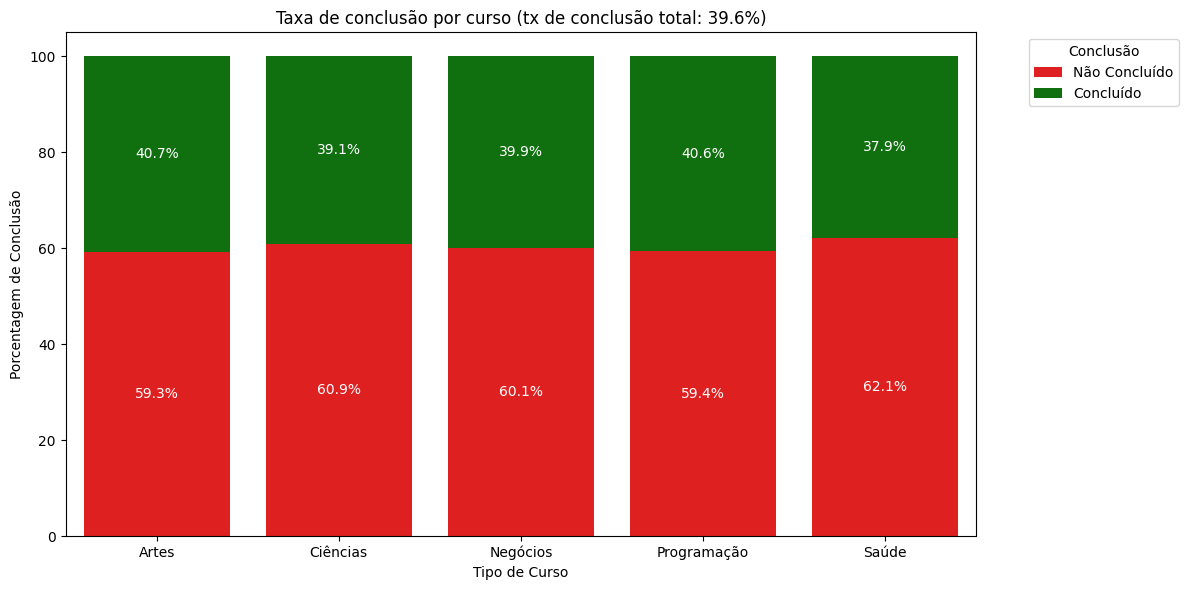

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados por tipo de curso e calcula a contagem de concluídos e não concluídos
curso_concluido_por_tipo = dtAnalises.groupby(['Tipo', 'Curso_concluido'])['Curso_concluido'].count().unstack()

"""
.unstack(): Transforma o objeto Series com índice hierárquico em um DataFrame.
"""

# Calcula as porcentagens
total = curso_concluido_por_tipo.sum(axis=1)
percentual = curso_concluido_por_tipo.div(total, axis=0) * 100

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=percentual.reset_index(), x='Tipo', y=0, color='red', label='Não Concluído')
ax = sns.barplot(data=percentual.reset_index(), x='Tipo', y=1, bottom=percentual[0], color='green', label='Concluído')

# Adiciona rótulos de dados
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white')

# Calcula a porcentagem total de conclusão
total_concluidos = dtAnalises['Curso_concluido'].sum()
total_cursos = len(dtAnalises)
porcentagem_total_conclusao = (total_concluidos / total_cursos) * 100

# Adiciona a porcentagem total de conclusão ao título
plt.title(f'Taxa de conclusão por curso (tx de conclusão total: {porcentagem_total_conclusao:.1f}%)')
plt.xlabel('Tipo de Curso')
plt.ylabel('Porcentagem de Conclusão')
plt.legend(title='Conclusão', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

A maior parte das pessoas que iniciaram o curso, não terminaram (cerca de 60%).

## Tempo Gasto vs. Notas das Provas Por Curso concluido

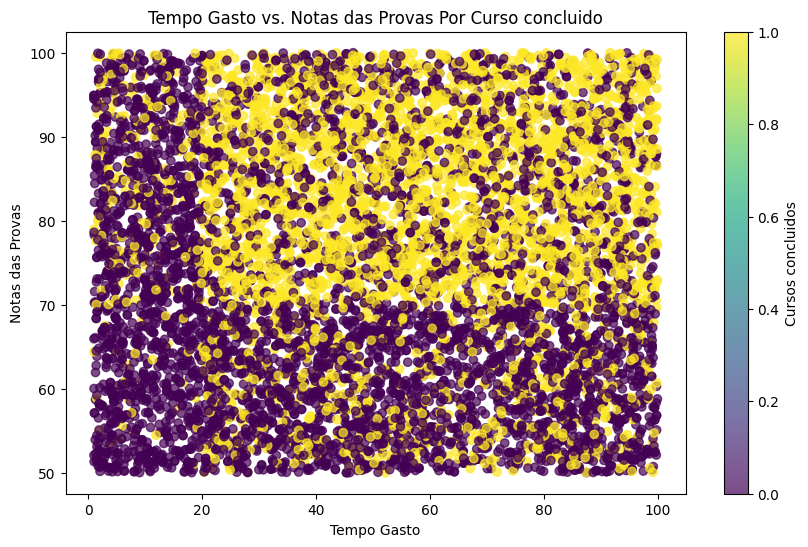

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dtAnalises['Tempo_Gasto'], dtAnalises['Notas_Provas'], c=dtAnalises['Curso_concluido'], cmap='viridis', alpha=0.7)
plt.xlabel('Tempo Gasto')
plt.ylabel('Notas das Provas')
plt.title('Tempo Gasto vs. Notas das Provas Por Curso concluido')
_ = plt.colorbar(label='Cursos concluidos')

As pessoas que gastam mais de 20 horas e tem uma média acima de 70 pontos nas provas, tem uma maior taxa de conclusão dos cursos

#Definindo variáveis de treino

In [72]:
x = dados[['Tipo', 'Tempo_Gasto', 'Videos_assistidos', 'Provas_feitas', 'Notas_Provas', 'Taxa_conclusao', 'Dispositivo']]
y = dados['Curso_concluido']

In [73]:
#Definindo a base de teste estratificada com 75% para treino e 25% para teste

SEED = 5 #Inclusão de seed para que o treino ocorra sempre com os mesmos testes (Não random)
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.15,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

Treinaremos com 7650 elementos e testaremos com 1350 elementos


#Algorítimos

##DummyClassifier (Base Line)

In [74]:
#Criando a BaseLine com um algorítimo básico

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(raw_treino_x, treino_y)
acuracia = dummy_stratified.score(raw_teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)
print(SEED)

A acurácia do dummy stratified foi 60.37%
5


In [75]:
#Baseline trinando com o resultado mais frequente (O que mais aparece)

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(raw_treino_x, treino_y)
acuracia = dummy_mostfrequent.score(raw_teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 60.37%


##LinearSVC (não recomendado)

In [76]:
#Acurácia usando uma regressão linear => Crua

# -> Ao usar o modelo assim, o SVC não identifica uma melhor resposta. Com isso,
# devemos escalonar nossas variáveis para que ele possa fazer os cálulos de forma satisfatória

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC(max_iter=1000)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 66.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*O aviso acima ocorre porque esse não é o melhor algorítimo para o uso nesse projeto.*

##SVC (88.09% de acurácia)

In [77]:
#Acurácia usando uma regressão linear => onde usamos o mesmo parâmetro para todas as variáveis (Scala)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_treino_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)




Treinaremos com 6750 elementos e testaremos com 6750 elementos
A acurácia foi 88.09%


##Decision Three (96.13% de acurácia) -> Modelo recomendado

A acurácia foi 96.13%


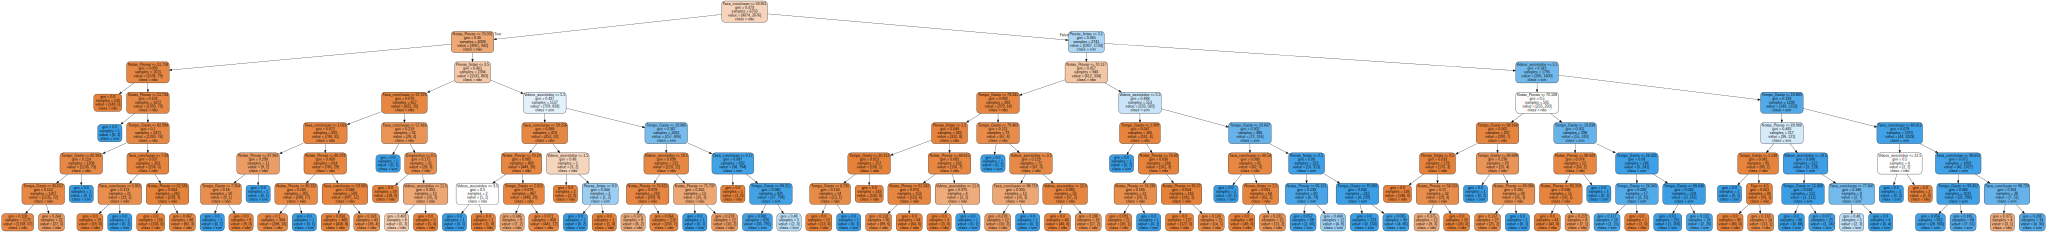

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


modelo = DecisionTreeClassifier(max_depth=len(x.columns))
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Exibindo a árvore de decisão
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não", "sim"])

grafico = graphviz.Source(dot_data)
grafico